# Automatic Run with NEXT

This Notebook uses a pre-trained coefficient estimator to automatically generate temperature estimates for a given watershed.  Right now, the location has to be a USGS gage, but it doesn't have to have stream temperature.  A pre-processed geopackage of watershed boundaries (e.g., a nextgen hydrofabric subset) can also be used.

In [1]:
from NEXT import NEXT, full_data, all_data_gpkg
import matplotlib.pyplot as plt
import geopandas as gp
import shutil
import os
import pandas as pd

In [2]:
nx = NEXT.from_default_pickle()

# USGS Version

In [3]:
site = "10343500"  # Sagehen
name = "Sagehen Creek"
# site = "06719505"  # Clear Creek (Q, no T)
# name = "Clear Creek at Golden, CO"
# site = "02465000"  # Black Warrior R. (Q, no T) (National Water Center)
# name = "Black Warrior River near Tuscaloosa, AL"

In [4]:
fn = f"results/inputs_{site}.csv"
if os.path.exists(fn):
    ws_data = pd.read_csv(fn)
    ws_data["date"] = pd.to_datetime(ws_data["date"])
else:
    ws_data = full_data(site, "2000", "2022")
    ws_data.to_csv(fn, index=False)
ws_data

,id,id_type,lat,lon,area,water,developed,barren,forest,shrubland,...,unknown,ice_snow,elev,slope,elev_min,date,tmax,prcp,srad,vp
0,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.0,0.0,2162.9973,0.000196,1929.5134,2000-01-01,1.196154,5.166539,210.084990,288.28156
1,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.0,0.0,2162.9973,0.000196,1929.5134,2000-01-02,-0.663077,0.000000,300.111540,208.34999
2,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.0,0.0,2162.9973,0.000196,1929.5134,2000-01-03,6.506923,0.000000,304.526920,339.36390
3,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.0,0.0,2162.9973,0.000196,1929.5134,2000-01-04,1.881923,0.000000,257.923070,347.22806
4,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.0,0.0,2162.9973,0.000196,1929.5134,2000-01-05,1.855000,0.000000,296.135380,272.50308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.0,0.0,2162.9973,0.000196,1929.5134,2022-12-27,3.190384,39.528847,131.424600,492.26614
8391,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.0,0.0,2162.9973,0.000196,1929.5134,2022-12-28,1.175385,0.000000,210.277310,377.98578
8392,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.0,0.0,2162.9973,0.000196,1929.5134,2022-12-29,2.854615,9.133078,156.367310,437.02386
8393,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.0,0.0,2162.9973,0.000196,1929.5134,2022-12-30,4.925000,74.243460,100.436165,633.59534


In [5]:
use_clim = True
nx.make_newt(ws_data, use_climate=use_clim, reset=True)

In [6]:
res = nx.run(ws_data)
res

,id,id_type,lat,lon,area,water,developed,barren,forest,shrubland,...,slope,elev_min,date,tmax,prcp,srad,vp,actemp,anom,temp.mod
0,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.000196,1929.5134,2000-01-01,1.196154,5.166539,210.084990,288.28156,4.768480,-0.014863,4.753616
1,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.000196,1929.5134,2000-01-02,-0.663077,0.000000,300.111540,208.34999,4.785110,-0.060085,4.725024
2,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.000196,1929.5134,2000-01-03,6.506923,0.000000,304.526920,339.36390,4.802664,-0.047775,4.754889
3,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.000196,1929.5134,2000-01-04,1.881923,0.000000,257.923070,347.22806,4.821088,-0.149530,4.671558
4,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.000196,1929.5134,2000-01-05,1.855000,0.000000,296.135380,272.50308,4.840326,-0.344862,4.495464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.000196,1929.5134,2022-12-27,3.190384,39.528847,131.424600,492.26614,4.604637,0.940946,5.545582
8391,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.000196,1929.5134,2022-12-28,1.175385,0.000000,210.277310,377.98578,4.557692,0.433861,4.991554
8392,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.000196,1929.5134,2022-12-29,2.854615,9.133078,156.367310,437.02386,4.512123,0.130177,4.642300
8393,10343500,usgs,39.431572,-120.237979,2.525875e+07,0.0,0.000323,0.0,0.970142,0.02611,...,0.000196,1929.5134,2022-12-30,4.925000,74.243460,100.436165,633.59534,4.467941,0.025831,4.493772


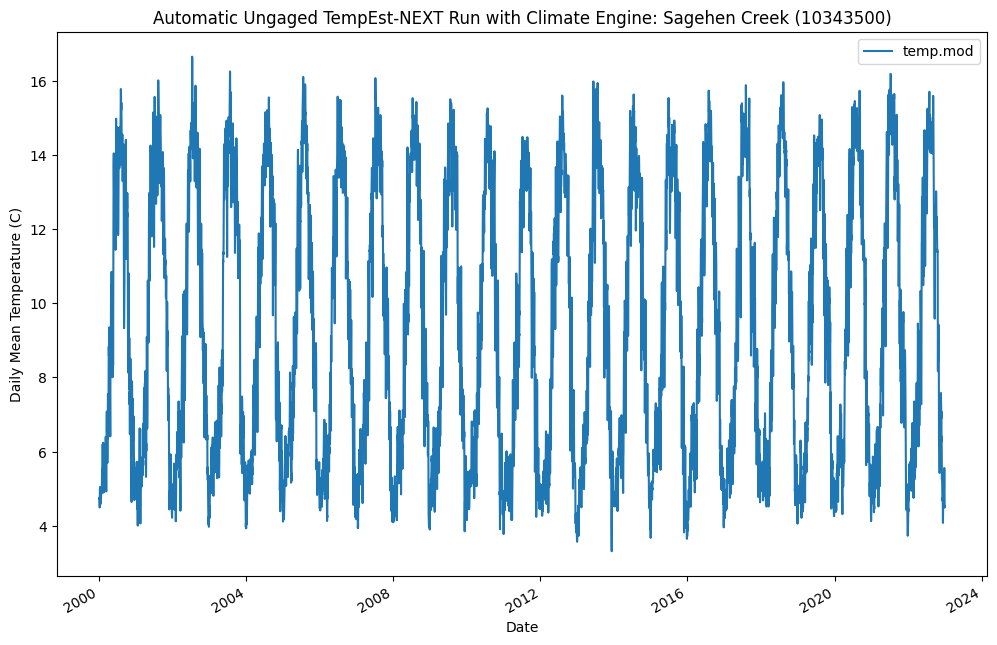

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
res.plot(x="date", y="temp.mod", ax=ax, title=f"Automatic Ungaged TempEst-NEXT Run{' with Climate Engine' if use_clim else ''}: {name} ({site})",
        xlabel="Date", ylabel="Daily Mean Temperature (C)")
plt.savefig(f"results/UngagedAuto_{site}_{'with' if use_clim else 'without'}ClimateEngine.png", dpi=1200, bbox_inches="tight")

# Geopackage Version